<a href="https://colab.research.google.com/github/Natanriv/hello-world/blob/master/DEA_Final_Project_NatanRoyFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team: Ad Identifier**
**Roy Montemayor and Natan Rivera**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import collections
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Check Data and Clean Up

In [ ]:
df=pd.read_csv("add.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Drop the unnamed column since this is the index

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

#convert columns to integers
df.columns=df.columns.astype('int')

In [ ]:
df.dtypes.head(3)

0    object
1    object
2    object
dtype: object

Information of our dataset

In [ ]:
# data set information
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


We know that 28% of the first three columns are missing from the webpage of data.

In [ ]:
#This result should be float but is an object cause of the missing values
df.iloc[:,0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3279 non-null   object
 1   1       3279 non-null   object
 2   2       3279 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB


In [ ]:
#missing data
df[0][10] 

'   ?'

AxesSubplot(0.125,0.125;0.775x0.755)


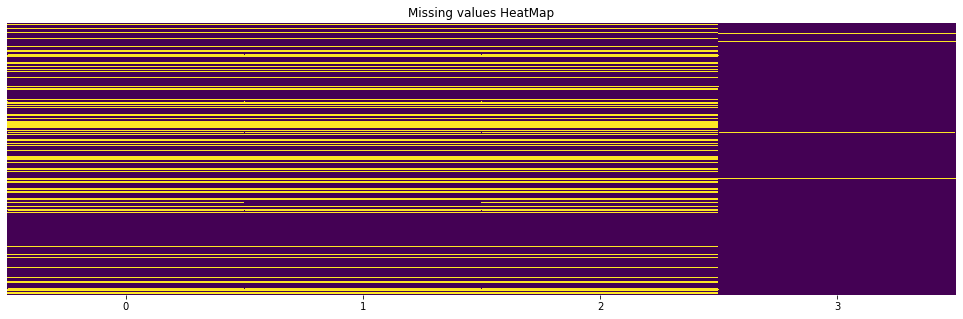

In [ ]:
#heatmap for missing data in the first 4 columns
newdf=df.iloc[:,[0,1,2,3]]
newdf=newdf.applymap(lambda x:'?' in str(x))
plt.figure(figsize=(17,5))
plt.title("Missing values HeatMap")
print(sns.heatmap(newdf,cbar=False,yticklabels=False,cmap='viridis'))

Find the frequency of the missing values

In [ ]:
for i in (newdf):
    print('column['+str(i)+'] has missing values -'+str(sum(newdf[i])))

column[0] has missing values -903
column[1] has missing values -901
column[2] has missing values -910
column[3] has missing values -15


Replace missing values for the mean of the column.

In [ ]:
def replace_missing(df):
    """ This function will replace any miissing value with the aggregated mean of the data as a 'float' to increase precision """
    for i in df:
        df[i]=df[i].replace('[?]',np.NAN,regex=True).astype('float')
        df[i]=df[i].fillna(df[i].mean())
    return df

Replace missing values for first 4 columns

In [ ]:
# Here we use the function above to facilitate replacing values
df[[0,1,2,3]]=replace_missing(df.iloc[:,[0,1,2,3]].copy()).values

In [ ]:
# We use a lambda function to convert float values into rounded decimals to get a nominal output
df[3]=df[3].apply(lambda x:round(x))

# Double check the information of the dataset
df.iloc[:,3:4].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   3       3279 non-null   int64
dtypes: int64(1)
memory usage: 25.7 KB


# Exploratory Data Analysis

In [ ]:
# General information on the dataset
df[[0,1,2,3]].describe()

,0,1,2,3
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,3.911953,0.768222
std,46.703695,110.729038,5.136153,0.422032
min,1.000000,1.000000,0.001500,0.000000
25%,32.500000,90.000000,1.279400,1.000000
50%,64.021886,150.000000,3.911953,1.000000
75%,64.021886,155.344828,3.911953,1.000000
max,640.000000,640.000000,60.000000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

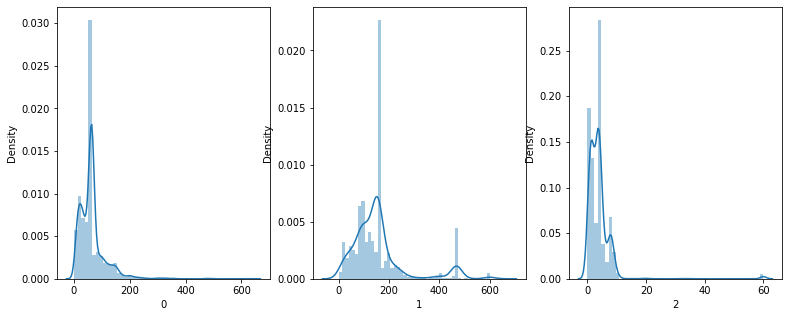

In [ ]:
# With this plot, we can visualize the data and see that it is right-skewed
fig,ax=plt.subplots(nrows=1,ncols=3)
fig.set_figheight(5)
fig.set_figwidth(13)
sns.distplot(df[0],ax=ax[0])
sns.distplot(df[1],ax=ax[1])
sns.distplot(df[2],ax=ax[2])

**Pairplot** This is really important. Notice how columns 4, 500, and 1000 have mainly 0 values. The reason why is because each column represents binary represenation of comparing html of images that are in the same webpage, or html information shared between images. This information is not useful for us since it does not provide categorical information each image, but it can be used to build an algorithm with the specific column and values. **Therefore, the most important variables are 0 to 3.**

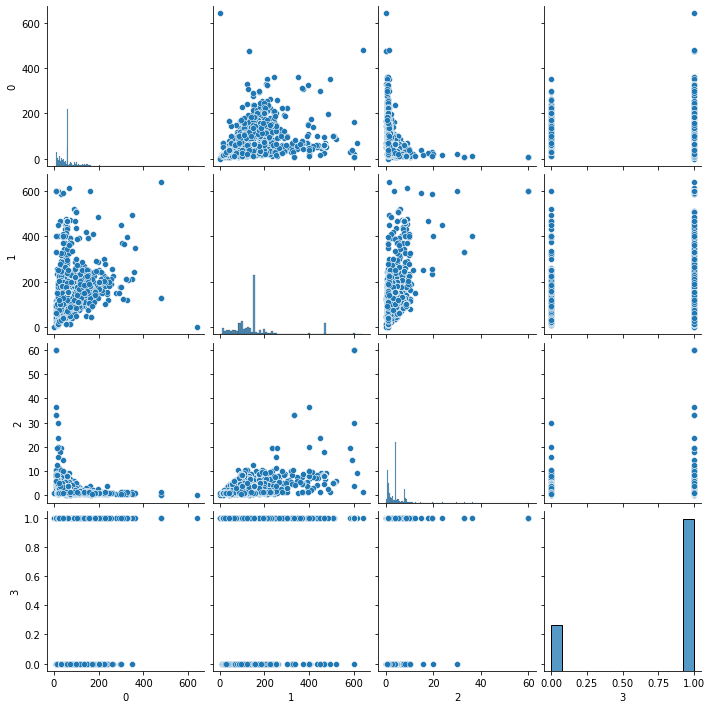

In [ ]:
#Simple pairplot
sns.pairplot(data=df.iloc[:,[0,1,2,3]])

## Plot Continuous Data

Here, we can use a strip plot to show the variance in the data. In other words, this plot will show us the relation between each column and all features. 

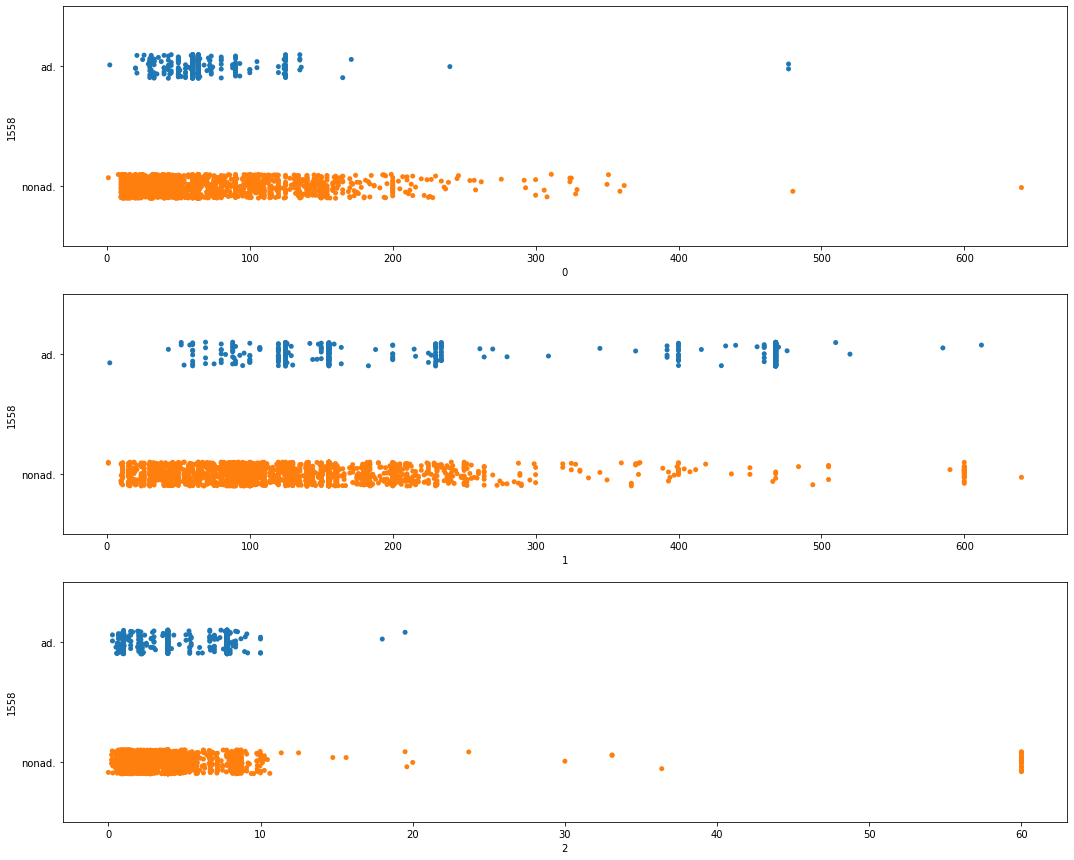

In [ ]:
#here we will plot the continous data vs the ad and non ad to see how is it distributed

fig,ax=plt.subplots(nrows=3,ncols=1)
fig.set_figheight(15)
fig.set_figwidth(18)
sns.stripplot(y=1558,x=0,data=df,ax=ax[0])
sns.stripplot(y=1558,x=1,data=df,ax=ax[1])
sns.stripplot(y=1558,x=2,data=df,ax=ax[2])
plt.show()

Now, we decide to use a Boxplot to help us visualize / understand the data. We can see that there is a very high number of outliers in the non-ad target, the non-ad data is highly skewed, and the width of ad is much larger compared to nonad. 

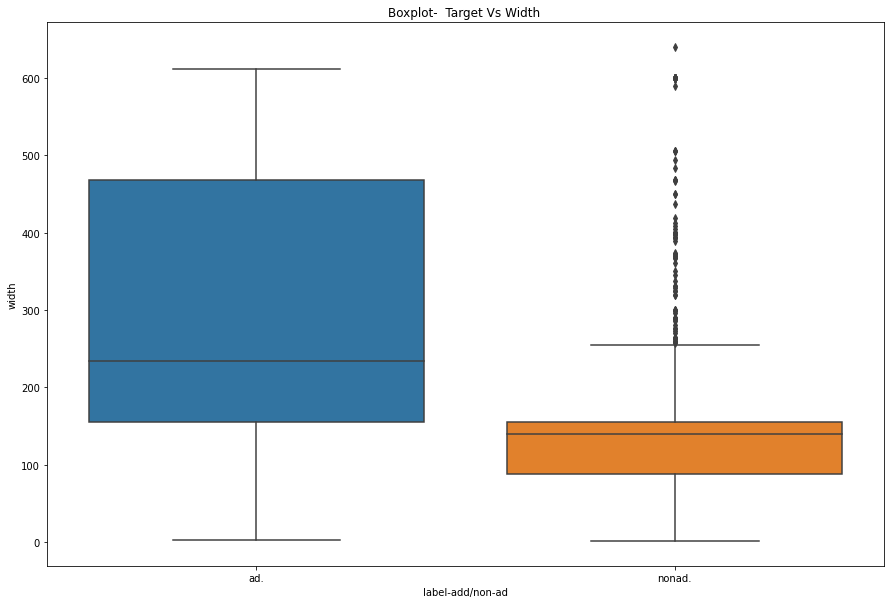

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot:  Target Vs Width ")
plt.show()

## Convert Last Column to 0s and 1s


'0' - non advertisement image

'1' - advertisement image

In [ ]:
# Change last column to numeric
df.iloc[:,-1]=df.iloc[:,-1].replace(['ad.','nonad.'],[1,0])

## Preparing features for model

We will use all the features

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Scaling data

We use Feature Scaling to bring all values to same magnitude.

In [ ]:
scaled = StandardScaler()
x = scaled.fit_transform(x)

We can see the results where we have data that is much cleaner and better to use

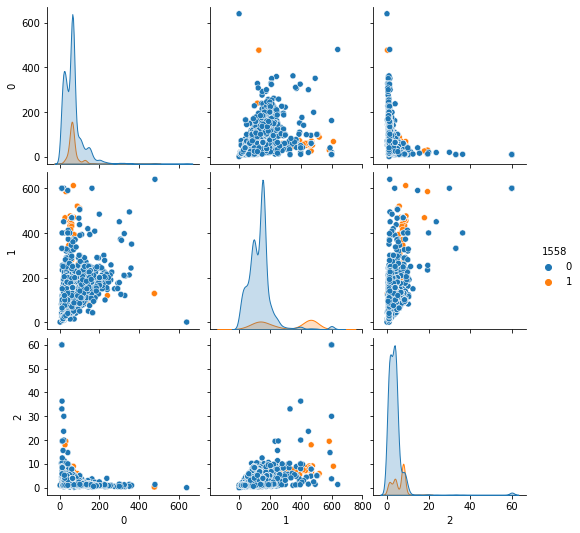

In [ ]:
sns.pairplot(data=df.iloc[:,[0,1,2,-1]], hue=1558)
plt.show()

Split the train and test sets.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0) # 70% to train

## Modeling

We will start checking which model is better for our data. We defined two functions that help us define which model is better. The first function will just take in the models that we want and fit the data passed in for that specific type of model. The second function will use take in the models that are now fit with the data from the first function and generate a classification report. This allows us to easily see their respected accuracy. With these two functions, we have a clean and streamlined way of checking for accuracy and selecting which models we should use. Additionally, if we see that a model is not suited for this data, we can easily replace it with another and see how the new one performs. 

In [ ]:
#Fitting models
#this first function fit multiple models by sklearn and return the dictionary with values as  objects of models
def fit_models(classifiers,xtrain,ytrain):
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

#Classification Reports
#This function generate classification accuracy report for given input model objects
def classification_multi_report(ytest,models_array):
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))

#Cross Validation
#This function return cross validated accuray and the variance of given input model obejects
def cross_Fucntion(models,cv):
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

#This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters
def multi_grid_search(param_grid_array,estimator_list,x,y):
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

# Naive Bayes Model

 We had a problem with running Naive Bayes since our dataset contains discrete and continuous data. Therefore, we will mix bernoulli NB and Gaussian NB to improve this model. Then, we will check the classification result outside of the built functions.

In [ ]:
#Naive bayes classifier
#mixed NB for continuous and binary features


#calculate continous variables predicted probbability with gaussianNb
gaussian=GaussianNB()
gaussian.fit(xtrain[:,0:4],ytrain)

#calculate binaru variables predicted probbability with bernoulliNB
bernoulli=BernoulliNB()
bernoulli.fit(xtrain[:,4:1558],ytrain)

#multiply each probaility and divide by prior probability which for the binary case of ours is 1

final_y= gaussian.predict_proba(xtest[:,0:4])*bernoulli.predict_proba(xtest[:,4:1558])


#final y is the predicted y which if the probability is higher we pick that label
for i in range(final_y.shape[0]):
  if final_y[i,0]<final_y[i,1]:
    final_y[i,:]= int(1)
  else:
    final_y[i,:]= int(0)



print(classification_report(np.array(ytest), np.array(final_y[:,0])))
               


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       830
           1       0.96      0.83      0.89       154

    accuracy                           0.97       984
   macro avg       0.96      0.91      0.93       984
weighted avg       0.97      0.97      0.97       984



We will start using the functions we wrote above to start training the models and seeing how they perform. Additionally, since Logisitic Regression is our baseline model, we can have a benchmark value from the classification report to compare the other models to. 

In [ ]:
# In this section, we are creating a list of the models that we will test, fitting the data into each model, 
# then creating a classification report for each one to compare performances

classifiers=[SVC, KNeighborsClassifier, GaussianNB, RandomForestClassifier, LogisticRegression]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       830
           1       0.99      0.80      0.88       154

    accuracy                           0.97       984
   macro avg       0.98      0.90      0.93       984
weighted avg       0.97      0.97      0.97       984

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       830
           1       0.97      0.71      0.82       154

    accuracy                           0.95       984
   macro avg       0.96      0.86      0.90       984
weighted avg       0.95      0.95      0.95       984

__________________________________________________
the model - <class 'sklearn.naive_bayes.GaussianNB'>
              pr

We can also look at the test and training mean absolute error to give us a better idea on how our models are performing. Alongisde the classification report, the test and training errors can also give us a way to compare the perfomance of the models and help us choose the best one.

In [ ]:
#This function will generate the average error rate for a given input
def average_error_rate(test, pred):
    diff = np.abs(test - pred)
    return np.divide(diff, test).mean()

In [ ]:
# Here we are just going through each model we chose and calculing the training / test mean absolute error
# and the training / test mean error

for i in model_list:
        print('__________________________________________________')
        print('the model - '+str(i))
        y_pred_train_af = model_list[i].predict(xtrain)
        y_pred_test_af = model_list[i].predict(xtest)
        print("Training mean absolute error is: ", mean_absolute_error(ytrain, y_pred_train_af))
        print("Test mean absolute error is: ", mean_absolute_error(ytest, y_pred_test_af))
        print()
        print("Training mean error rate is: ", average_error_rate(ytrain, y_pred_train_af))
        print("Test mean error rate is: ", average_error_rate(ytest, y_pred_test_af))
        

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
Training mean absolute error is:  0.023965141612200435
Test mean absolute error is:  0.032520325203252036

Training mean error rate is:  inf
Test mean error rate is:  inf
__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Training mean absolute error is:  0.03224400871459695
Test mean absolute error is:  0.047764227642276426

Training mean error rate is:  inf
Test mean error rate is:  inf
__________________________________________________
the model - <class 'sklearn.naive_bayes.GaussianNB'>
Training mean absolute error is:  0.19651416122004356
Test mean absolute error is:  0.20426829268292682

Training mean error rate is:  inf
Test mean error rate is:  inf
__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Training mean absolute error is:  0.000

# **Bias and Variance Tradeoff**

Now, we can apply kfold cross validation to check bias and variance in the models. We will interpret the results to choose the model with the lowest variance. 

In [ ]:
# We will use the function that was written above for 20-fold cross validation
obj=cross_Fucntion(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

the model -<class 'sklearn.svm._classes.SVC'>has 
 || crosss validated accuracy as  -> 0.963405797101449 | variance - 0.01216698765813483 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.neighbors._classification.KNeighborsClassifier'>has 
 || crosss validated accuracy as  -> 0.9507589626239511 | variance - 0.017031118243722665 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.naive_bayes.GaussianNB'>has 
 || crosss validated accuracy as  -> 0.786487414187643 | variance - 0.0234725216874411 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._forest.RandomForestClassifier'>has 
 || crosss validated accuracy as  -> 0.9764721586575131 | variance - 0.012657551018494667 ||
_________________________________________

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## HyperParameter Optimization

We want to optiimize the hyperparameters for our different to see which model could be tuned to yield the best results. Thus, we chose to use Grid Search to tune the parameters for the different models. We chose Grid Search because this process can be applied across multiple models and is not specific to one type of model. With this in mind, we used this process to generate the best parameters for each of our models. 

In [ ]:
# Here, we are creating different grids of parameters for the different models that we use that we will 
# pass into the Grid Search CV to optimize the hyperparameters.

param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,50),
        'p':[2]
        
    }
]

param_grid_nb=[
    {}
]

param_grid_forest = [
  { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
  }
]


param_grid_logistic = [
  {
    'C': np.logspace(-3,3,7),
    'penalty': ['l1', 'l2']
  }
]



param_grid_array=[param_grid_svm, param_grid_knn, param_grid_nb, param_grid_forest, param_grid_logistic]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{"<class 'sklearn.svm._classes.SVC'>": ({'degree': 1,
   'kernel': 'poly',
   'random_state': 0},
  0.9625272331154683),
 "<class 'sklearn.neighbors._classification.KNeighborsClassifier'>": ({'n_neighbors': 3,
   'p': 2},
  0.9529411764705882),
 "<class 'sklearn.naive_bayes.GaussianNB'>": ({}, 0.7938997821350762),
 "<class 'sklearn.ensemble._forest.RandomForestClassifier'>": ({'criterion': 'gini',
   'max_depth': 8,
   'max_features': 'auto',
   'n_estimators': 500},
  0.9416122004357298),
 "<class 'sklearn.linear_model._logistic.LogisticRegression'>": ({'C': 0.1,
   'penalty': 'l2'},
  0.970806100217865)}

## Results

Finally, we can choose what we see to be the best performing model(s) based on the different metrics we used previously to compare model performance. From these metrics, we chose to models that we saw perform best. These are: Logistic Regression and Random Forest Classfier. These two models were the best performing from the different models we tested. Below, we show their classification report again and show how each performed on the data.

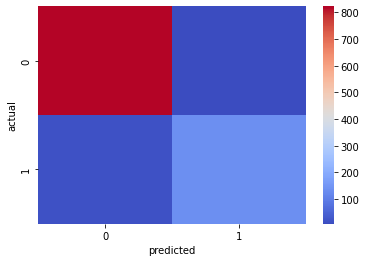

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       830
           1       0.95      0.88      0.91       154

    accuracy                           0.97       984
   macro avg       0.96      0.93      0.95       984
weighted avg       0.97      0.97      0.97       984



In [ ]:
# The Logistic Regression Model was one of the best performing models after we did hypterparameter optimization.
# We chose this model as one of the two that we saw to perform best with our data.
# Here, we are showing the results. with this model.
classifier_logistic=LogisticRegression(C= 0.1, penalty= 'l2')

#Fit the data
classifier_logistic.fit(xtrain,ytrain)

# Create a visual Confusion Matrix that shows how the model performed
sns.heatmap(pd.crosstab(ytest,classifier_logistic.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# Show the classification report once more to have those scores again
print(classification_report(ytest,classifier_logistic.predict(xtest)))

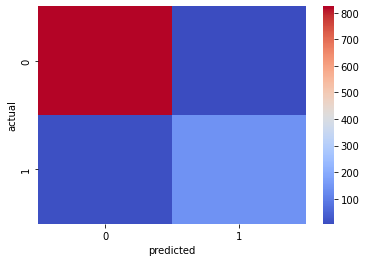

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       830
           1       0.96      0.92      0.94       154

    accuracy                           0.98       984
   macro avg       0.97      0.95      0.96       984
weighted avg       0.98      0.98      0.98       984



In [ ]:
# Similarly to what we did above, we chose a Random Forest Classifier model to be our second best model based on
# its performance and the score from cross-validation.
classifier_forest=RandomForestClassifier()

#Fit the data
classifier_forest.fit(xtrain,ytrain)

# Create a visual Confusion Matrix that shows how the model performed
sns.heatmap(pd.crosstab(ytest,classifier_forest.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# Show the classification report once more to have those scores again
print(classification_report(ytest,classifier_forest.predict(xtest)))

## Feature Selection

Since we are using all the features due to the encoding, we want to see if less features can yield good results.

We will use step forward feature selection for this.

In [ ]:
#Install mlxtend
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import sequenctial features selector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
sfs = SFS(LogisticRegression(), 
           k_features=1,# the more features we want, the longer it will take to run
           forward=True, 
           floating=False, # see the docs for more details in this parameter
           verbose=0, # this indicates how much to print out intermediate steps
           scoring='neg_mean_absolute_error',
           cv=3)

sfs = sfs.fit(xtrain, ytrain)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

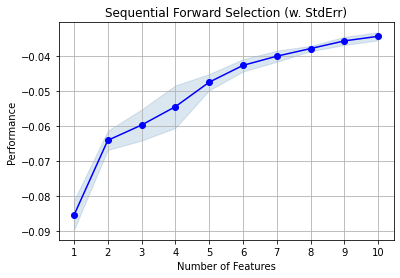

In [ ]:
# Here, we are visualizing the performance of the model with a given number of inputs to help see what would be 
# the best number of features.

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In the plot above, we can see that the number of features is 10, but we have plenty more. The problem is that is quite computational expensive to run the SFS for 1500 features. Overall, the accuracy is high enough that using all the features provides great results.